# Unsupervised Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from scipy.optimize import minimize

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 14)
np.set_printoptions(suppress = True)

## K-means clustering (theory)

#### Import data

In [2]:
data1 = loadmat('data/ex7data2.mat')

#### Initialize centroids

In [3]:
K = 3
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

#### Helper functions

In [4]:
def distance(x, p):
    return np.sqrt((x[0] - p[0])**2 + (x[1] - p[1])**2)

In [5]:
def closest_centroid(X, centroids):
    K = centroids.shape[0]
    m = X.shape[0]
    dis = np.zeros((m, K))
    
    for i in range (K):
        for j in range (m):
            dis[j][i] = distance( X[j], centroids[i] )
    
    return np.argmin( dis, axis = 1) + 1

If everything is implemented correctly, the *closest_centroid* function should return *[1 3 2]* for the initial example.

In [6]:
idx = closest_centroid(data1['X'], initial_centroids)
print(idx[:3])

[1 3 2]


#### Compute centroid means

In [7]:
def compute_centroid_mean(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    for i in range(K):
        cluster_point = idx == i + 1
        x = X[cluster_point]
        centroids[i] = np.mean(x, axis = 0)
        
    return centroids

In [8]:
compute_centroid_mean(data1['X'], idx, K)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

## K-means clustering (dataset)

#### Some helper functions

In [9]:
def plot_data(X, idx, K, axes = None):
    
    if axes == None:
        axes = plt.gca()
    
    color = iter(cm.rainbow(np.linspace(0, 1, K)))
    
    for i in range (K):
        cluster_point = idx == i + 1
        c = next(color)
        axes.scatter(X[cluster_point][:,0], X[cluster_point][:,1], marker = 'o', s = 30, edgecolors = c, facecolors = 'None', linewidth = 0.7)

In [10]:
def plot_path_Kmeans(X, previous, idx, K, i):
    axes = plt.gca()
    plot_data(X, idx, K, axes)
    
    for j in range(previous.shape[1]):
        c_points = previous[:,2] == j + 1
        axes.plot(previous[c_points][:,0], previous[c_points][:,1], 'kx--', markeredgewidth = 2, markersize = 6, linewidth = 2, label = 'centroids')
    
    axes.set_title(f'Iteration number {i+1}')

In [11]:
def run_Kmeans(X, initial_centroids, max_iters, plot_progress):
    
    m, n = X.shape
    K = initial_centroids.shape[0]
    previous_centroids = np.c_[ np.copy(initial_centroids), np.arange(1, K + 1) ]
    centroids = np.copy(initial_centroids)
    idx = np.zeros((m, 1))
    
    for i in range(max_iters):
        
        print(f"K-means iteration {i+1}")
        
        idx = closest_centroid( X, centroids )
        
        if plot_progress:
            plot_path_Kmeans( X, previous_centroids, idx, K, i )
                 
        centroids = np.c_[ compute_centroid_mean( X, idx, K ), np.arange(1, K + 1) ]
        previous_centroids = np.concatenate( (previous_centroids, centroids), axis = 0)
    
    return( centroids[:,:centroids.shape[1]-1], idx )

K-means iteration 1
K-means iteration 2
K-means iteration 3
K-means iteration 4
K-means iteration 5
K-means iteration 6
K-means iteration 7
K-means iteration 8
K-means iteration 9
K-means iteration 10
(3, 2)


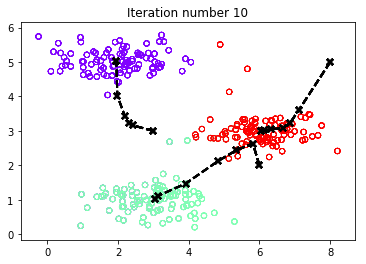

In [12]:
new_centroids, new_idx = run_Kmeans(data1['X'], initial_centroids, 10, True)
print(new_centroids.shape)

In [13]:
print( new_centroids[:, :2])

[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


#### Random initialization (just for practice)

In [14]:
def kmeans_init_centroids(X, K):
    np.random.shuffle(X)
    return X[:K,:]

In [15]:
kmeans_init_centroids(data1['X'], data1['X'].shape[1] + 1)

array([[4.43152976, 0.54041   ],
       [2.79995882, 5.11526323],
       [3.20360621, 0.7222149 ]])

## Image compression with K-means

#### Import image

In [16]:
img = plt.imread('data/bird_small.png')

img_shape = img.shape

print(img_shape)

(128, 128, 3)


In [17]:
img_X = img.reshape(img_shape[0] * img_shape[1], img_shape[2])

print(img_X.shape)

(16384, 3)


#### Compress image using 16 colors

In [18]:
K_colors = 16
max_iter = 10

In [19]:
initial_centroids = kmeans_init_centroids(np.copy(img_X), K_colors)

print(initial_centroids.shape)

(16, 3)


In [20]:
img_centroids, img_idx = run_Kmeans(img_X, initial_centroids, max_iter, False)

K-means iteration 1
K-means iteration 2
K-means iteration 3
K-means iteration 4
K-means iteration 5
K-means iteration 6
K-means iteration 7
K-means iteration 8
K-means iteration 9
K-means iteration 10


In [21]:
print('Centroid shape:', img_centroids.shape)
print('Indices shape:', img_idx.shape)

Centroid shape: (16, 3)
Indices shape: (16384,)


In [22]:
img_idx = closest_centroid(img_X, img_centroids)

#### Recover original picture

In [23]:
X_recovered = img_centroids[img_idx - 1,:]

X_recovered = X_recovered.reshape(img_shape[0], img_shape[1], img_shape[2])

print(X_recovered.shape)

(128, 128, 3)


#### Compressed image

Text(0.5,1,'Compressed image with 16 colors')

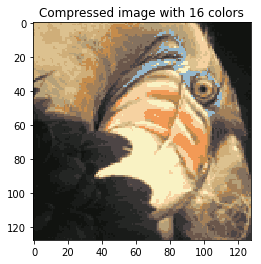

In [24]:
plt.imshow(X_recovered)
plt.title(f'Compressed image with {K_colors} colors')

#### Original image

Text(0.5,1,'Original image (uncompressed)')

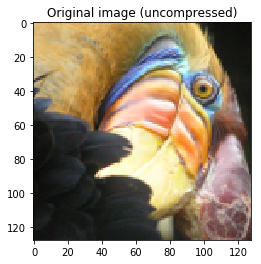

In [25]:
plt.imshow(img)
plt.title('Original image (uncompressed)')

## Principal Component Analysis (PCA)

#### Import data

In [26]:
data2 = loadmat('data/ex7data1.mat')

print(data2['X'].shape)

(50, 2)


#### Plot data

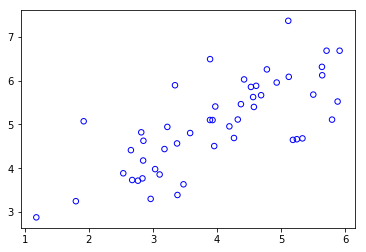

In [27]:
plt.scatter(data2['X'][:,0], data2['X'][:,1], s = 30, edgecolors = 'b', facecolors = 'None', linewidth = 1)

#### Implement PCA

In [28]:
def feature_normalize(X):
    mu = X.mean(axis = 0)
    sigma = X.std(axis = 0)
    
    return (X - X.mean(axis = 0)) / X.std(axis = 0), mu, sigma

In [29]:
X_norm, mu, sigma = feature_normalize(data2['X'])

In [30]:
def pca(X):
    m, n = X.shape
    cov_data = (X.T.dot(X)) / m
    U, S, V = np.linalg.svd(cov_data)
    
    return (U, S)

In [32]:
U, S = pca(X_norm)
print(U, S)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]] [1.73553038 0.26446962]


In [33]:
print (mu)

[3.98926528 5.00280585]


#### Plot vectors

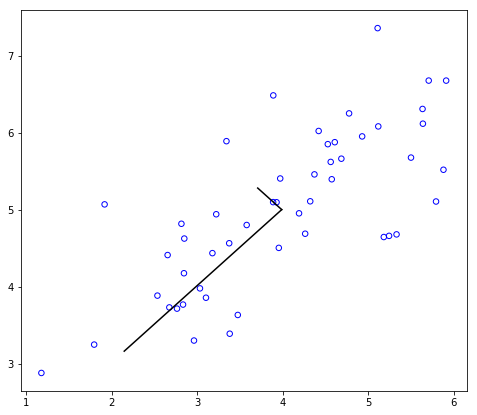

In [35]:
plt.rcParams['figure.figsize'] = (8.0, 7.0)

plt.scatter( data2['X'][:,0], data2['X'][:,1], s=30, edgecolors='b',facecolors='None', linewidth=1 )
plt.plot( np.append( mu[0], mu[0] + 1.5*S[0]*U[0,0] ), np.append( mu[1], mu[1] + 1.5*S[0]*U[1,0] ),'k-', linewidth=1.5 )
plt.plot( np.append( mu[0], mu[0] + 1.5*S[1]*U[0,1] ), np.append( mu[1], mu[1] + 1.5*S[1]*U[1,1] ), 'k-', linewidth=1.5 )

### Dimensionality reduction with PCA

In [36]:
def project_data(X, U, K):
    U_reduce = U[:, :K]
    
    return X.dot(U_reduce)

In [37]:
K = 1
Z = project_data(X_norm, U, K)

print(Z[0])

[1.49631261]


#### Reconstruct an approximation of the data

In [39]:
def recover_data(Z, U, K):
    U_reduce = U[:, :K]
    
    return U_reduce.dot(Z.T)

In [40]:
X_approx = recover_data(Z, U, K)
X_approx = X_approx.T

print(X_approx[0])

[-1.05805279 -1.05805279]


#### Visualize projections

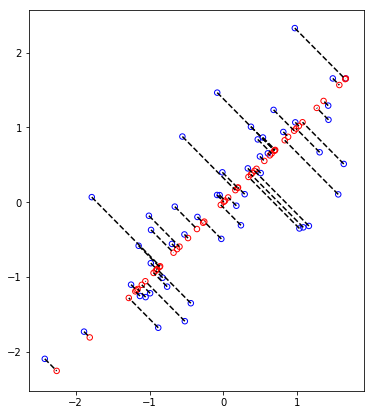

In [41]:
plt.rcParams['figure.figsize'] = (6.0, 7.0)

plt.scatter( X_norm[:,0], X_norm[:,1], s = 30, edgecolors = 'b',facecolors = 'None', linewidth = 1 )
plt.scatter( X_approx[:,0], X_approx[:,1], s = 30, edgecolors = 'r',facecolors = 'None', linewidth = 1 )

for i in range(X_approx.shape[0]):
    plt.plot( (X_norm[i,0], X_approx[i,0]), (X_norm[i,1], X_approx[i,1]), 'k--' )

## PCA on faces

#### Import data

In [42]:
faces = loadmat('data/ex7faces.mat')
print(faces['X'].shape)

(5000, 1024)


#### Visualize data

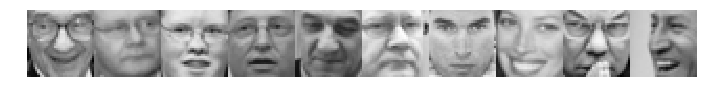

In [43]:
plt.rcParams['figure.figsize'] = (12,4)

sample = np.arange(10)
data_plot = faces['X'][sample,:].reshape( -1, 32 ).T # Make a 10X32X32 array and rotate
img = plt.imshow(data_plot, cmap = cm.Greys_r)
plt.axis('off');

#### Implement PCA

In [44]:
X_norm_f, mu_f, sigma_f = feature_normalize(faces['X'])

In [45]:
U_f, S_f = pca(X_norm_f)

In [46]:
print(U_f.shape)

(1024, 1024)


#### Visualize

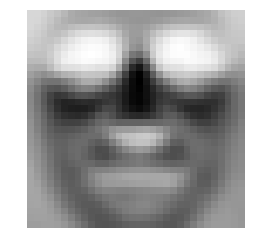

In [47]:
plt.rcParams['figure.figsize'] = (4,4)

sample = np.arange(2)
data_plot = U_f[:,5].reshape( -1, 32).T
img = plt.imshow(data_plot, cmap = cm.Greys_r)
plt.axis('off');

#### DImensionality reduction

In [48]:
Z_f = project_data(X_norm_f, U_f, K = 36)

In [49]:
X_approx_f = recover_data(Z_f, U_f, K = 36)

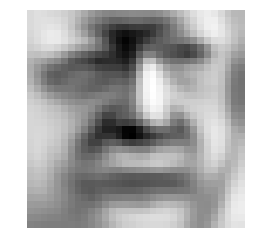

In [50]:
plt.rcParams['figure.figsize'] = (4,4)

sample = np.arange(2)
data_plot = X_approx_f[:,5].reshape( -1, 32).T
img = plt.imshow(data_plot, cmap = cm.Greys_r)
plt.axis('off');

## PCA for visualization

In [51]:
img_X_norm, mu_img, sigma_img = feature_normalize(img_X)

In [52]:
U_img, S_img = pca(img_X_norm)

In [53]:
Z_img = project_data(img_X_norm, U_img, 2)

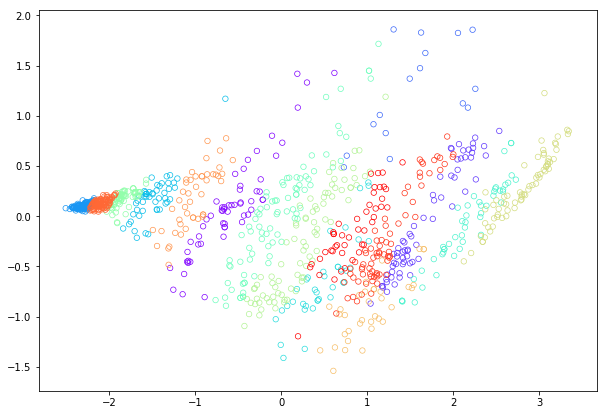

In [55]:
plt.rcParams['figure.figsize'] = (10.0, 7.0)

sample = np.random.choice( 16384, 1000 )
plot_data( -1*Z_img[sample,:], img_idx[sample], 16 )